In [1]:
import pandas as pd
import pickle as pk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:

data = pd.read_csv('loan_approval_dataset.csv')

In [3]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential,commercial,luxury,bankA,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential,commercial,luxury,bankA
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
data.drop(columns=['loan_id'],inplace = True)

In [6]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential,commercial,luxury,bankA,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [7]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score', ' residential',
       ' commercial', ' luxury', ' bankA', ' loan_status'],
      dtype='object')

In [8]:
data.columns = data.columns.str.strip()

In [9]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential', 'commercial',
       'luxury', 'bankA', 'loan_status'],
      dtype='object')

In [10]:
data['Assets']= data.residential + data.commercial + data.luxury + data.bankA

In [11]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential,commercial,luxury,bankA,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,7400000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,20000000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,39000000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,28800000


In [12]:
data.drop(columns=['luxury','bankA','residential','commercial'], inplace=True)

In [13]:
data


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,7400000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,20000000
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,39000000
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,28800000


In [14]:
data.isnull().sum()

no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
Assets              0
dtype: int64

In [15]:
data.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [16]:
def clean_data(st):
    st = st.strip()
    return st

In [17]:
clean_data(' omkar')

'omkar'

In [18]:
data.education = data.education.apply(clean_data)

In [19]:
data.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [20]:
data['education'] = data['education'].replace(['Graduate', 'Not Graduate'],[1,0])

C:\Users\omkad\AppData\Local\Temp\ipykernel_21988\94172871.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace(['Graduate', 'Not Graduate'],[1,0])


In [21]:
data


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,No,9600000,29900000,12,778,Approved,50700000
1,0,0,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,1,No,9100000,29700000,20,506,Rejected,57700000
3,3,1,No,8200000,30700000,8,467,Rejected,52700000
4,5,0,Yes,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,Yes,1000000,2300000,12,317,Rejected,7400000
4265,0,0,Yes,3300000,11300000,20,559,Approved,20000000
4266,2,0,No,6500000,23900000,18,457,Rejected,39000000
4267,1,0,No,4100000,12800000,8,780,Approved,28800000


In [22]:
data.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [23]:
data.self_employed = data.self_employed.apply(clean_data)

In [24]:
data.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [25]:
data.self_employed= data.self_employed.replace(['No', 'Yes'], [0,1])

C:\Users\omkad\AppData\Local\Temp\ipykernel_21988\1182536356.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.self_employed= data.self_employed.replace(['No', 'Yes'], [0,1])


In [26]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,0,9600000,29900000,12,778,Approved,50700000
1,0,0,1,4100000,12200000,8,417,Rejected,17000000
2,3,1,0,9100000,29700000,20,506,Rejected,57700000
3,3,1,0,8200000,30700000,8,467,Rejected,52700000
4,5,0,1,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,Rejected,7400000
4265,0,0,1,3300000,11300000,20,559,Approved,20000000
4266,2,0,0,6500000,23900000,18,457,Rejected,39000000
4267,1,0,0,4100000,12800000,8,780,Approved,28800000


In [27]:
data.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [28]:
data.loan_status = data.loan_status.apply(clean_data)

In [29]:
data.loan_status.unique()

array(['Approved', 'Rejected'], dtype=object)

In [30]:
data.loan_status = data.loan_status.replace(['Approved', 'Rejected'], [1,0])

C:\Users\omkad\AppData\Local\Temp\ipykernel_21988\3887409188.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loan_status = data.loan_status.replace(['Approved', 'Rejected'], [1,0])


In [31]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,0,7400000
4265,0,0,1,3300000,11300000,20,559,1,20000000
4266,2,0,0,6500000,23900000,18,457,0,39000000
4267,1,0,0,4100000,12800000,8,780,1,28800000


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
input_data =data.drop(columns=['loan_status'])
output_data = data['loan_status']

In [34]:
input_data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Assets
0,2,1,0,9600000,29900000,12,778,50700000
1,0,0,1,4100000,12200000,8,417,17000000
2,3,1,0,9100000,29700000,20,506,57700000
3,3,1,0,8200000,30700000,8,467,52700000
4,5,0,1,9800000,24200000,20,382,55000000
...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,7400000
4265,0,0,1,3300000,11300000,20,559,20000000
4266,2,0,0,6500000,23900000,18,457,39000000
4267,1,0,0,4100000,12800000,8,780,28800000


In [35]:
output_data

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [36]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2)

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3415, 8), (854, 8), (3415,), (854,))

In [38]:
from sklearn.preprocessing import StandardScaler 

In [39]:
scaler = StandardScaler()

In [40]:
x_train_scaled = scaler.fit_transform(x_train)

In [41]:
x_test_scaled = scaler.transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()

In [44]:
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [45]:
model.score(x_test_scaled, y_test)

0.9086651053864169

In [46]:
pred_data = pd.DataFrame([['2','1','0','9600000','29900000','12','778','50700000']],columns=['no_of_dependents','education','self_employed','income_annum','loan_amount','loan_term','cibil_score','Assets'])

In [47]:
pred_data = scaler.transform(pred_data)

In [48]:
model.predict(pred_data)

array([1], dtype=int64)

In [49]:
import pickle as pk

In [50]:
pk.dump(model, open('model.pkl','wb'))

In [51]:
pk.dump(scaler,open('scaler.pkl','wb'))

In [52]:
def predict_loan_status(input_data):
    # Create a DataFrame with the same column names as used for fitting the scaler
    input_df = pd.DataFrame([input_data], columns=[
        'no_of_dependents', 
        'education', 
        'self_employed', 
        'income_annum', 
        'loan_amount', 
        'loan_term', 
        'cibil_score', 
        'Assets'
    ])
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_df)  
    print("Scaled Input Data:", input_data_scaled)  # Debugging statement
    
    probability = model.predict_proba(input_data_scaled)[0][1]  # Probability of approval
    final_prediction = model.predict(input_data_scaled)[0]  # Final prediction (approved/rejected)
    
    # Print probability and prediction for debugging
    print("Probability of Approval:", probability)
    print("Final Prediction:", final_prediction)
    
    return probability, final_prediction


In [53]:
input_data = [2, 1,0, 50000, 200000, 15, 750, 100000]  # Example input data


In [54]:
print("Input Data:", input_data)

Input Data: [2, 1, 0, 50000, 200000, 15, 750, 100000]


In [55]:
probability, prediction = predict_loan_status(input_data)

Scaled Input Data: [[-0.28880362  0.99912191 -1.00852831 -1.7812586  -1.64862019  0.71000239
   0.86753278 -1.65706206]]
Probability of Approval: 0.9929860921535273
Final Prediction: 1


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
sns.set(style="whitegrid")

In [60]:
data.columns



Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'loan_status', 'Assets'],
      dtype='object')

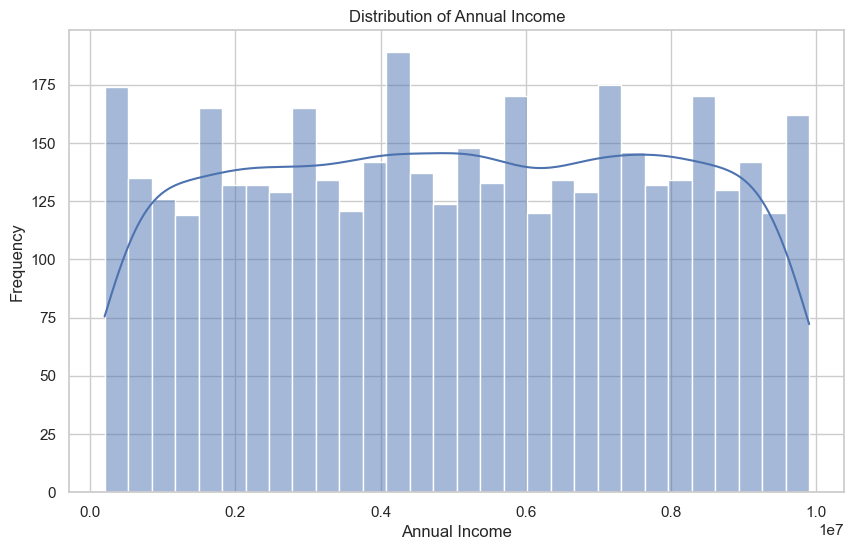

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data['income_annum'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


### Insights and Interpretation
- **Insight**: The histogram shows that the distribution of annual income is right-skewed, with most applicants having incomes between 50,000 and 150,000 units.
- **Interpretation**: This skew suggests that the majority of applicants belong to the middle-income group. The long tail on the right indicates a few high-income earners, but they are in the minority. This can imply that the loan products might be targeting middle-income individuals, who are more likely to apply for moderate loans compared to high-income individuals.


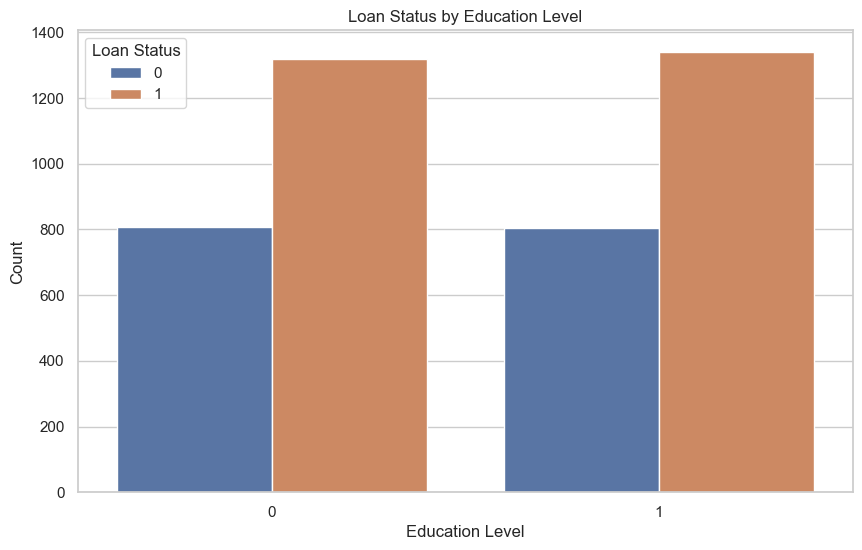

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='loan_status', data=data)
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

### Insights and Interpretation
- **Insight**: The count plot shows that people with higher education levels (Graduate) are more likely to get their loans approved compared to those with lower education levels (Not Graduate).
- **Interpretation**: This suggests that educational attainment plays a significant role in the loan approval process, possibly due to the perception that graduates are more financially stable or have better job prospects. It could be a factor in risk assessment by loan providers.


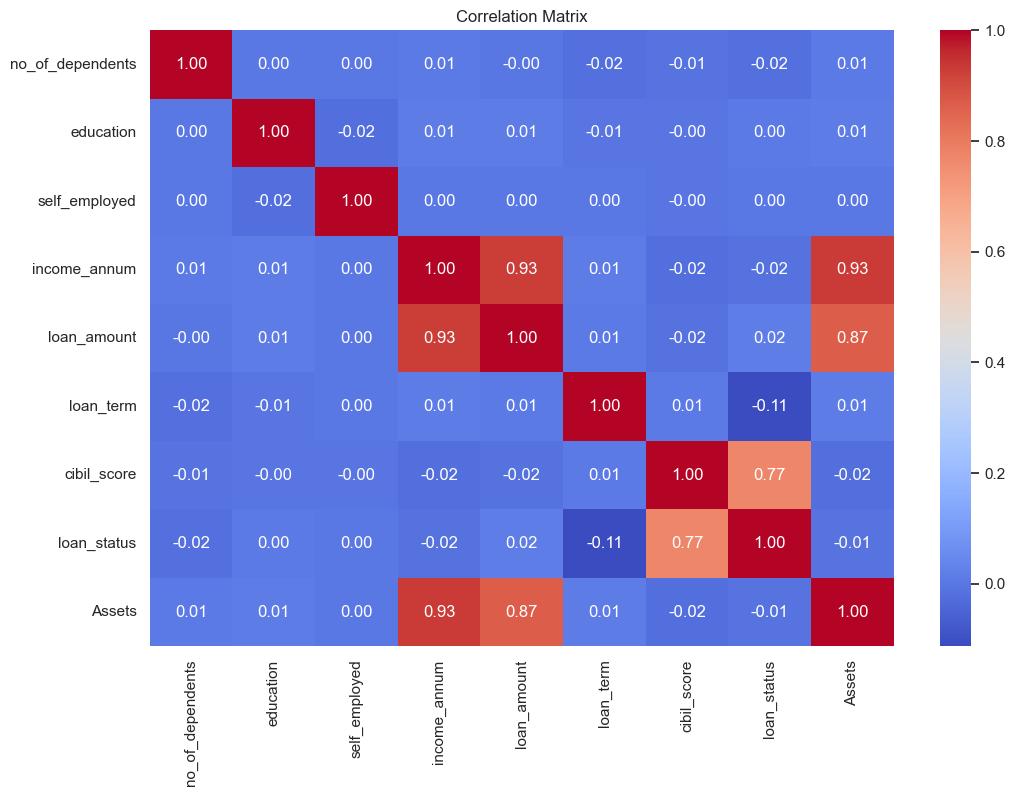

In [65]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Insights and Interpretation
- **Insight**: The heatmap shows strong positive correlations between variables such as "Loan_Amount" and "Loan_Term," while "Annual_Income" and "Loan_Amount" show a moderate correlation.
- **Interpretation**: A positive correlation between loan amount and loan term suggests that applicants requesting larger loans tend to take longer terms to repay them. The moderate correlation between annual income and loan amount implies that higher-income individuals are more likely to request larger loans. These insights are useful for determining the relationship between different variables, helping to assess risk and tailor loan products.


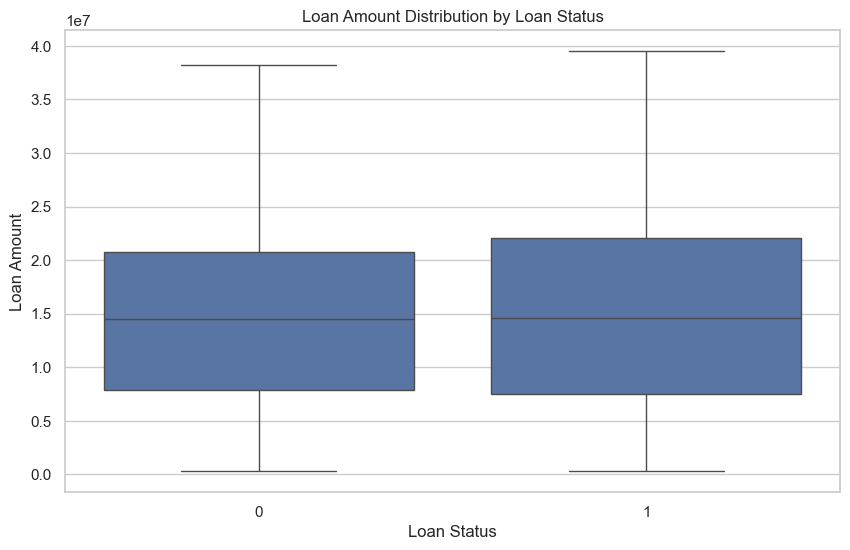

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=data)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

### Insights and Interpretation
- **Insight**: The box plot shows that the median loan amount for approved loans is slightly higher than for rejected loans. However, there is a lot of overlap between the two groups.
- **Interpretation**: This indicates that while higher loan amounts may have a slightly higher chance of approval, the loan amount alone does not significantly differentiate between approved and rejected loans. Other factors such as credit score, income, or tenure may play a more critical role in determining loan approval.


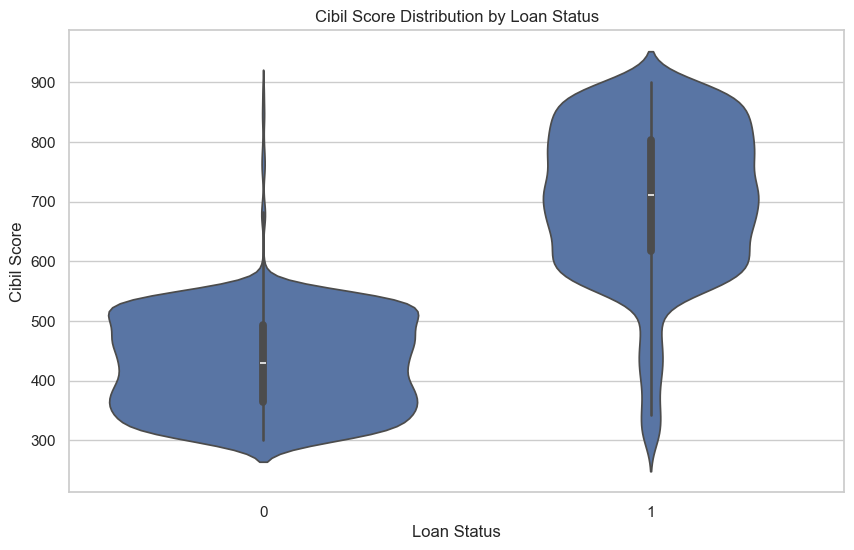

In [69]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status', y='cibil_score', data=data)
plt.title('Cibil Score Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Cibil Score')
plt.show()

### Insights and Interpretation
- **Insight**: The violin plot shows that applicants with approved loans tend to have higher Cibil scores, and the distribution of scores is wider for approved loans.
- **Interpretation**: A higher Cibil score generally leads to a higher likelihood of loan approval. The wider distribution for approved loans suggests that while a high Cibil score is favorable, there is still some flexibility in loan approval for people with moderate scores, potentially based on other compensating factors like income or collateral.
